<a href="https://colab.research.google.com/github/Venkats-AI-codes/AI_practices/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.** importing neccessary libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

**2. creating the custome data**

*   make_blobs(n_samples=500, n_features=2, centers=3): Generates 500 data points in a 2D space, grouped into 3 clusters.
*   plt.scatter(X[:, 0], X[:, 1]): Plots the dataset in 2D, showing all the points.
*   plt.show(): Displays the plot

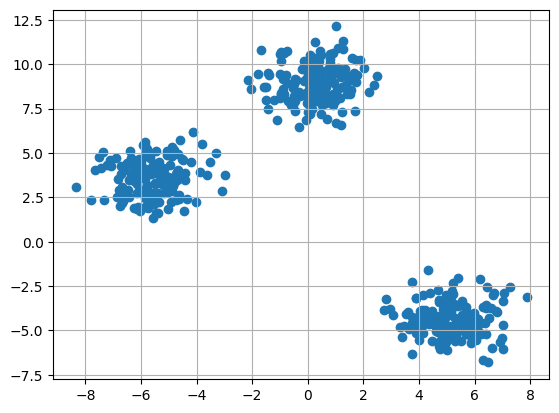

In [3]:
x,y = make_blobs(n_samples=500, n_features=2, centers=3, random_state = 23)
fig = plt.figure(0)
plt.grid(True)
plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [6]:
x, y

(array([[-4.96938657e+00,  3.53724005e+00],
        [-4.81246011e+00,  5.14500747e+00],
        [-5.02457784e+00,  3.16461048e+00],
        [ 6.42385686e+00, -3.54076191e+00],
        [-6.62888728e+00,  2.31853249e+00],
        [-6.68706136e+00,  3.09425861e+00],
        [-7.39409102e-01,  1.07626303e+01],
        [ 6.31100474e+00, -6.67020069e+00],
        [ 3.21685138e-01,  9.69462806e+00],
        [ 1.84611290e-01,  1.01316564e+01],
        [ 2.09690921e-01,  1.02065003e+01],
        [ 3.59151491e-01,  8.45404202e+00],
        [-5.64775461e+00,  3.83382472e+00],
        [-6.06049855e+00,  2.83328976e+00],
        [-6.35760385e+00,  4.72547889e+00],
        [-6.15384981e+00,  1.85617607e+00],
        [-6.08283166e+00,  4.44970935e+00],
        [ 5.72469417e-01,  9.17315007e+00],
        [-5.37336705e+00,  4.35938585e+00],
        [ 4.55964717e+00, -4.67524612e+00],
        [-1.41835597e+00,  9.50575600e+00],
        [ 5.19947795e+00, -2.78323398e+00],
        [ 1.26332633e+00,  1.129

**3. initializing random centroid**

*   np.random.seed(23): Ensures reproducibility by fixing the random seed.
*   The for loop initializes k random centroids, with values between -2 and 2, for a 2D dataset.

In [8]:
k = 3
clusters = {}
np.random.seed(23)

for idx in range(k):
  center = 2*(2*np.random.random((x.shape[1],))-1)
  points = []
  cluster = {
      'center': center,
      'points': points
  }
  clusters[idx] = cluster
clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

**4. Plotting Random Initialized Center with Data Points**

*   plt.grid(): Plots a grid.
*   plt.scatter(center[0], center[1], marker='*', c='red'): Plots the cluster center as a red star (* marker).

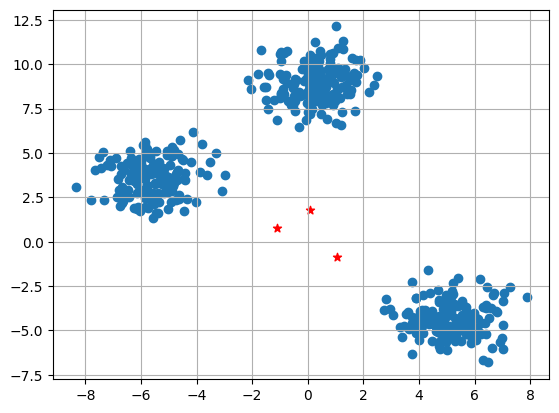

In [11]:
plt.scatter(x[:, 0], x[:, 1])
plt.grid(True)
for i in clusters:
  center = clusters[i]['center']
  plt.scatter(center[0], center[1], marker='*', c='red')
plt.show()

**5. Defining Euclidean Distance**
To assign data points to the nearest centroid, we define a distance function:

*   np.sqrt(): Computes the square root of a number or array element-wise.
*   np.sum(): Sums all elements in an array or along a specified axis

In [12]:
def distance(p1, p2):
  return np.sqrt(np.sum(p1-p2)**2)

**6. Creating Assign and Update Functions**
we define functions to assign points to the nearest centroid and update the centroids based on the average of the points assigned to each cluster.

*   dist.append(dis): Appends the calculated distance to the list dist.
*   curr_cluster = np.argmin(dist): Finds the index of the closest cluster by selecting the minimum distance.
*  new_center = points.mean(axis=0): Calculates the new centroid by taking the mean of the points in the cluster.

In [23]:
def asign_cluster(x, clusters):
    for idx in range(x.shape[0]):
        dist = []
        curr_x = x[idx]

        for i in range(k):
            dis = distance(curr_x, clusters[i]['center'])
            dist.append(dis)

        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)

    return clusters

def update_cluster(x, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])

        if len(points) > 0:
            new_center = points.mean(axis=0)
            clusters[i]['center'] = new_center

        clusters[i]['points'] = []

    return clusters

**7. Predicting the Cluster for the Data Points**
We create a function to predict the cluster for each data point based on the final centroids.

*   pred.append(np.argmin(dist)): Appends the index of the closest cluster (the one with the minimum distance) to pred.

In [24]:
def pred_cluster(x, clusters):
    pred = []
    for i in range(x.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(x[i], clusters[j]['center']))

        pred.append(np.argmin(dist))

    return pred

**8. Assigning, Updating and Predicting the Cluster Centers**
We assign points to clusters, update the centroids and predict the final cluster labels.

*   assign_clusters(X, clusters): Assigns data points to the nearest centroids.
*   update_clusters(X, clusters): Recalculates the centroids.
*   pred_cluster(X, clusters): Predicts the final clusters for all data points.

In [25]:
clusters = asign_cluster(x, clusters)
clusters = update_cluster(x, clusters)
pred = pred_cluster(x, clusters)

**9. Plotting Data Points with Predicted Cluster Centers**
Finally, we plot the data points, colored by their predicted clusters, along with the updated centroids.

*   center = clusters[i]['center']: Retrieves the center (centroid) of the current cluster.
*   plt.scatter(center[0], center[1], marker='^', c='red'): Plots the cluster center as a red triangle (^ marker).

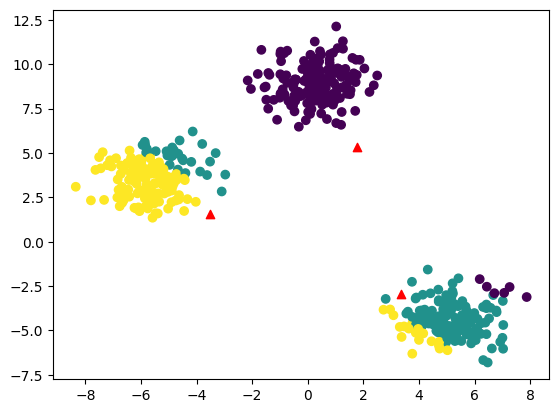

In [27]:
plt.scatter(x[:,0],x[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()